# Figures for paper 'Artificial SA-I, RA-I and RA-II/Vibrotactile Afferents for Tactile Sensing of Texture'

* code to generate Figures 8, 9, 10, 11, 12 and 13 of paper

To run, edit dir_data to point to the experimental data and results

In [5]:
import os, pickle, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy import signal

%matplotlib inline
np.random.seed(1)

def open_obj(name):
    with open(name + '.pkl', 'rb') as f:
        obj = pickle.load(f)
    return obj

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [6]:
import tensorflow as tf
from keras import Model
from keras.models import load_model

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ten

In [7]:
dir_data = os.environ["DATAPATH"] + r"/open/afferents-tactile-textures-jrsi2022/processed"
dir_models = os.environ["DATAPATH"] + r"/open/afferents-tactile-textures-jrsi2022/models"
dir_figures = os.environ["DATAPATH"] + r"/open/afferents-tactile-textures-jrsi2022/figures"

n_speeds = 10
n_textures = 13
n_pins = 19
n_static = 32500
n_dynamic = 3250
n_vibration = 780

os.makedirs(dir_figures, exist_ok=True)

--------------------------------------------------------------------------

## Fig. 8A

In [2]:
X_test = np.zeros((n_speeds, n_static, n_pins, n_pins, 1))
for j in range(n_speeds):
    X_test[j,:,:,:,:] = open_obj(dir_data + rf"/static/{j}/X_test_SA")
max_val = np.max([np.max(X_test[:,n_textures*500,:,:,0]),
                    np.max(X_test[:,4+n_textures*500,:,:,0]),
                    np.max(X_test[:,8+n_textures*500,:,:,0]),
                    np.max(X_test[:,12+n_textures*500,:,:,0])])
min_val = np.min([np.min(X_test[:,n_textures*500,:,:,0]),
                    np.min(X_test[:,4+n_textures*500,:,:,0]),
                    np.min(X_test[:,8+n_textures*500,:,:,0]),
                    np.min(X_test[:,12+n_textures*500,:,:,0])])

NameError: name 'np' is not defined

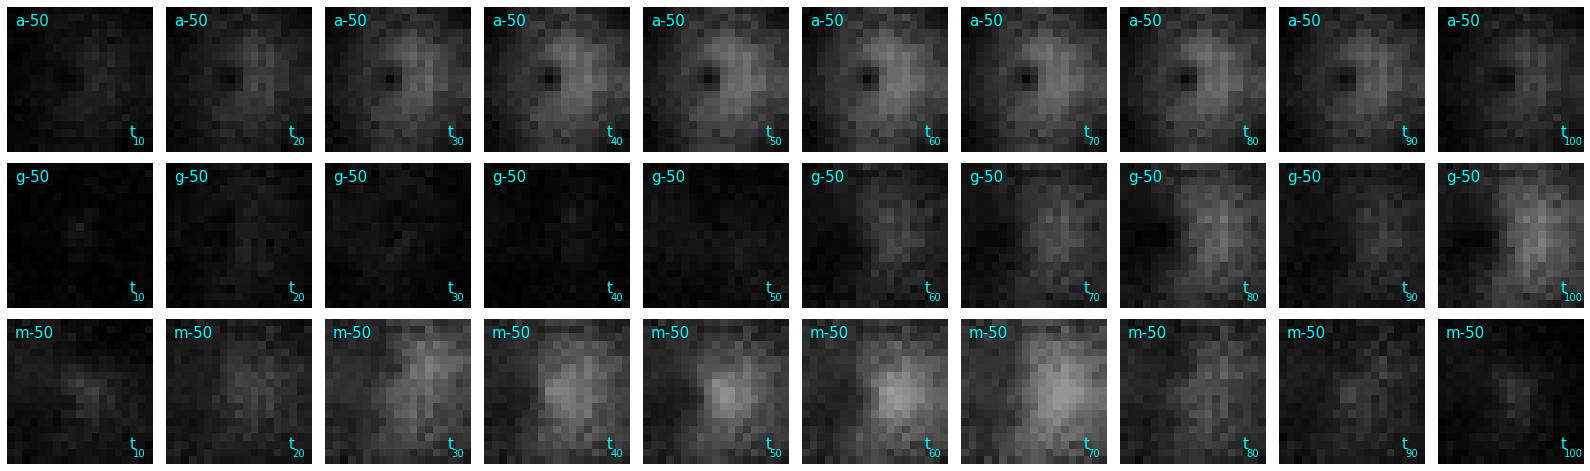

In [ ]:
speeds = [4,4,4]
textures = [0,6,12]
labels = ['a','g','m']
t_labels = ['10','20','30','40','50','60','70','80','90','100']

fig8A, axs = plt.subplots(3,10, figsize = (25*(4/7)*(5/4)*(10/8),7*1.5*(2/3)*(8/6)*0.95*(3/4)))
for i in range(3):
    X_test = open_obj(dir_data + rf"/dynamic/{speeds[i]}/X_test_SA")
    for j in range(10):
        axs[i,j].imshow(X_test[textures[i]+13*(100+1*j),1,:,:,0], cmap='gray', vmin=min_val, vmax=max_val)
        axs[i,j].axis('off')
        axs[i,j].text(0.5, 2, labels[i]+'-50', fontsize=15, color='cyan')
        axs[i,j].text(15.5, 16.5, 't', fontsize=15, color='cyan')
        axs[i,j].text(16, 17.5, t_labels[j], fontsize=10, color='cyan')
plt.subplots_adjust(wspace=0.05, hspace=0.08)
plt.tight_layout()
fig8A.savefig(dir_figures + r"/fig8a.png")

## Fig. 8B

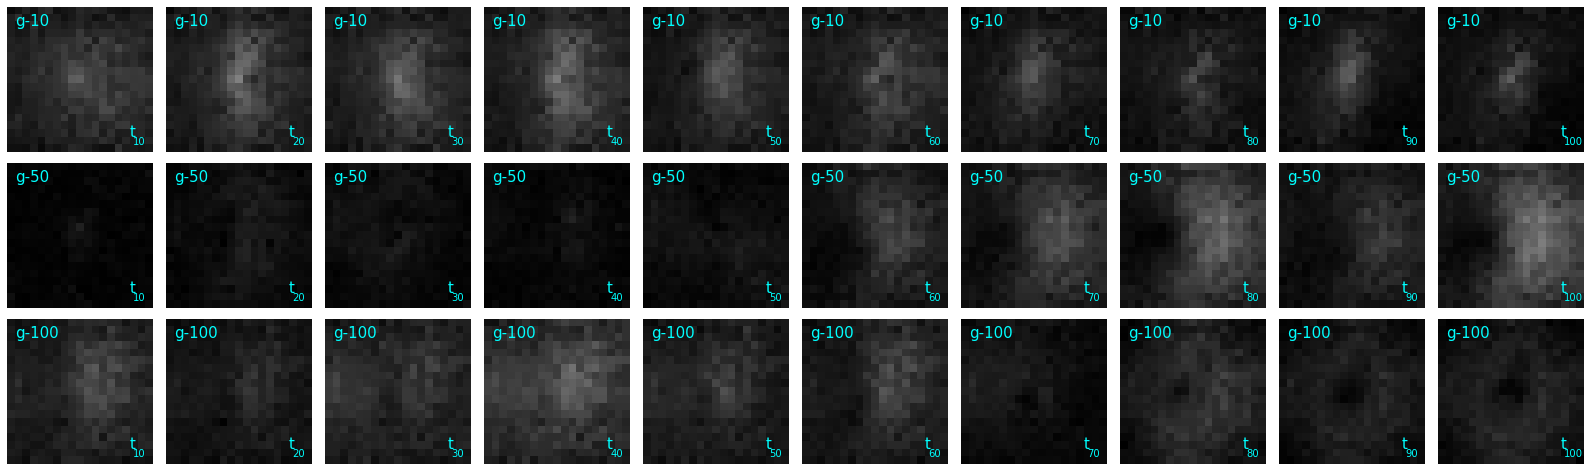

In [ ]:
speeds = [0,4,9]
textures = [6,6,6]
labels = ['10','50','100']
t_labels = ['10','20','30','40','50','60','70','80','90','100']

fig8B, axs = plt.subplots(3,10, figsize = (25*(4/7)*(5/4)*(10/8),7*1.5*(2/3)*(8/6)*0.95*(3/4)))
for i in range(3):
    X_test= open_obj(dir_data + rf"/dynamic/{speeds[i]}/X_test_SA")
    for j in range(10):
        axs[i,j].imshow(X_test[textures[i]+13*(100+1*j),1,:,:,0], cmap='gray', vmin=min_val, vmax=max_val)
        axs[i,j].axis('off')
        axs[i,j].text(0.5, 2, 'g-'+labels[i], fontsize=15, color='cyan')
        axs[i,j].text(15.5, 16.5, 't', fontsize=15, color='cyan')
        axs[i,j].text(16, 17.5, t_labels[j], fontsize=10, color='cyan')
        
plt.subplots_adjust(wspace=0.05, hspace=0.08)
plt.tight_layout()
fig8B.savefig(dir_figures + r"/fig8b.png")

--------------------------------------------------------------------------

## Fig. 9A

In [ ]:
result = np.empty((n_speeds,n_static,n_textures))
for i in range(n_speeds):
    print(i, end=' ')
    X_test = open_obj(dir_data + rf"/static/{i}/X_test_SA")
    model = load_model(glob.glob(dir_models + rf"/static_SA/{i}/*.hdf5")[-1])
    result[i] = model.predict(X_test)

save_obj(result, dir_figures + r"/result9a")

0 WARNING:tensorflow:From C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.


1 2 3 4 5 6 7 8 9 

In [ ]:
result = open_obj(dir_figures + r"/result9a")
accuracies = np.zeros(n_speeds)
cm = np.zeros((n_speeds,n_textures,n_textures))
for i in range(n_speeds):
    y_test = open_obj(dir_data + rf"/static/{i}/y_test_SA")
    label_test = np.zeros((n_static,1))
    prediction = np.zeros((n_static,1))
    for k in range(n_static):
        label_test[k] = np.where(y_test[1][k,:]==1)[0][0]
        prediction[k] = np.argmax(result[i,k,:])
        if prediction[k]==label_test[k]: accuracies[i]+=1
    cm[i] = confusion_matrix(label_test, prediction)

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


mean accuracy=46%


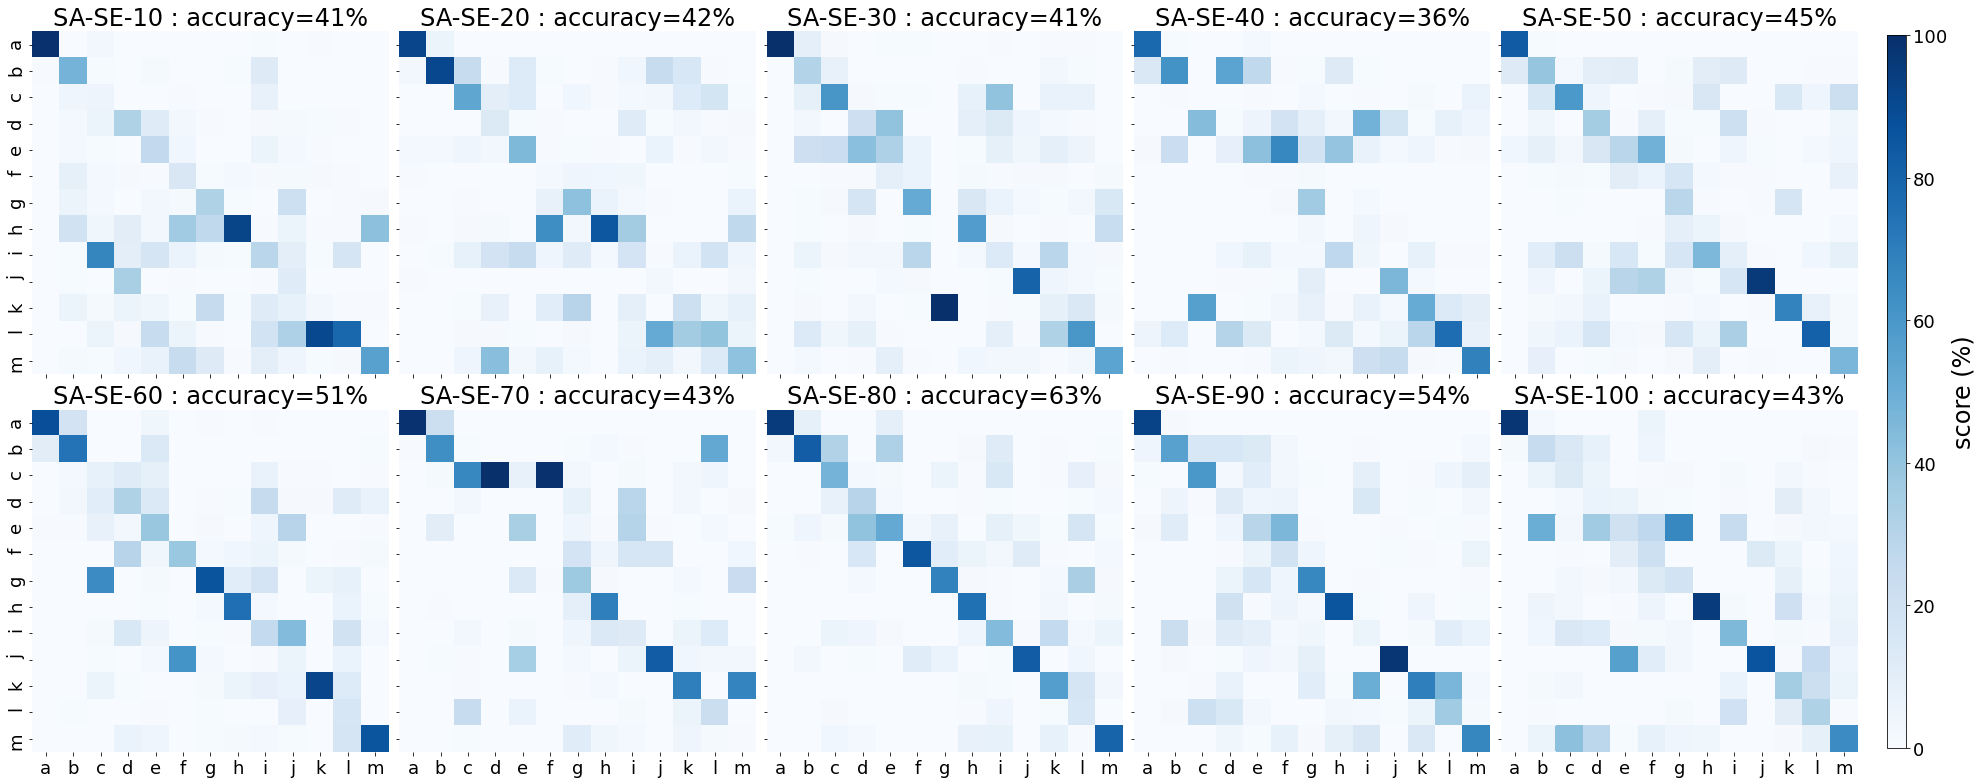

In [ ]:
fig9A, axs = plt.subplots(2,5, figsize=(26,11))
colour = sns.color_palette("Blues",2500)
for i, ax in enumerate(axs.flat):
        sns.heatmap(np.transpose(cm[i]/25), vmin=0, vmax=100, cmap=colour, ax=ax, cbar=False)
        ax.set_xticklabels([], rotation=0)
        ax.set_yticklabels([], rotation=0)
        ax.set_yticks(np.linspace(0.5, 12.5, 13))
        ax.set_title(f'SA-SE-{int(10*(i+1))} : accuracy={int(np.round(100*accuracies[i]/n_static))}%', size=24)

axs[0,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
axs[1,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
for j in range(5):
        axs[1,j].set_xticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=0, size=18)

fig9A.subplots_adjust(right=0.85)
cax = fig9A.add_axes([1.01, 0.05, 0.01, 0.9])
cbar = fig9A.colorbar(axs[0,0].collections[0], cax=cax)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('score (%)', size=24)

plt.tight_layout()
fig9A.savefig(dir_figures + r"/fig9a.png")

print("mean accuracy={:.0f}%".format(100*np.mean(accuracies)/n_static))

--------------------------------------------------------------------------

## Fig. 9B

In [ ]:
result = np.empty((n_speeds,n_dynamic,n_textures))
for i in range(n_speeds):
    print(i, end=' ')
    X_test = open_obj(dir_data + rf"/dynamic/{i}/X_test_SA")
    model = load_model(glob.glob(dir_models + rf"/dynamic_SA/{i}/*.hdf5")[-1])
    result[i,:,:] = model.predict(X_test)

save_obj(result, dir_figures + r"/result9b")

0 1 2 3 4 5 6 7 8 9 

In [ ]:
result = open_obj(dir_figures + r"/result9b")
accuracies = np.zeros(n_speeds)
cm = np.zeros((n_speeds,n_textures,n_textures))
for i in range(n_speeds):
    y_test = open_obj(dir_data + rf"/dynamic/{i}/y_test_SA")
    label_test = np.zeros((n_dynamic,1))
    prediction = np.zeros((n_dynamic,1))
    for k in range(n_dynamic):
        label_test[k] = np.where(y_test[1][k,:]==1)[0][0]
        prediction[k] = np.argmax(result[i,k,:])
        if prediction[k]==label_test[k]: accuracies[i]+=1
    cm[i] = confusion_matrix(label_test, prediction)

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


mean accuracy=46%


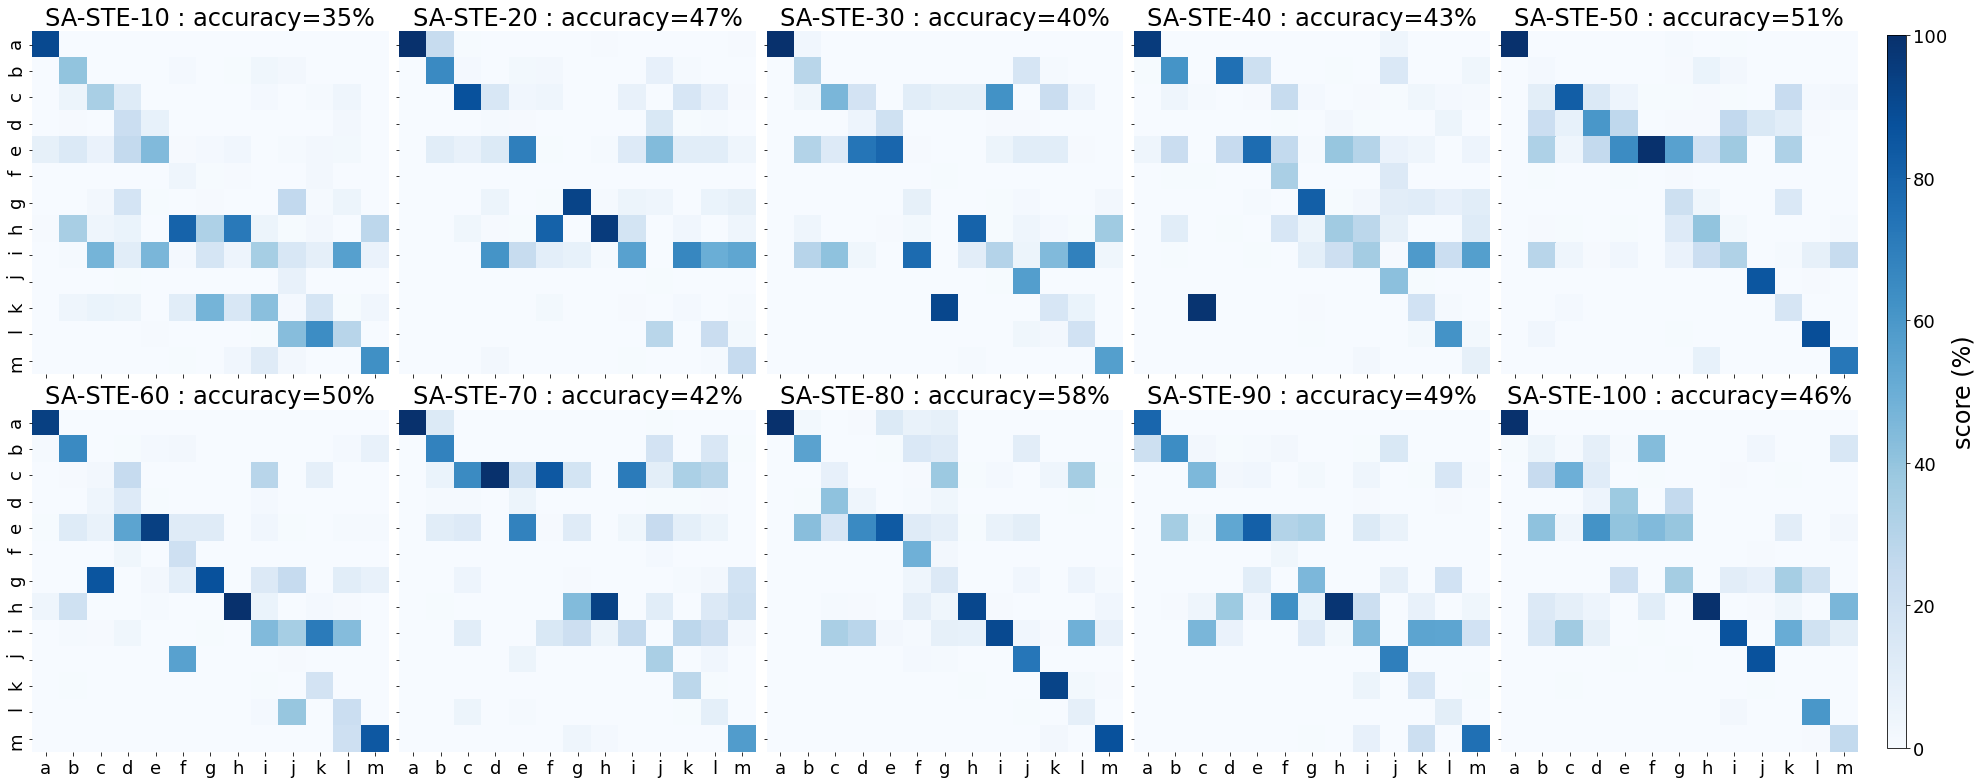

In [ ]:
fig9B, axs = plt.subplots(2,5, figsize = (26,11))
colour = sns.color_palette("Blues", 250)
for i, ax in enumerate(axs.flat):
        sns.heatmap(np.transpose(cm[i]/2.5), vmin=0, vmax=100, cmap=colour, ax=ax, cbar=False)
        ax.set_xticklabels([], rotation=0)
        ax.set_yticklabels([], rotation=0)
        ax.set_yticks(np.linspace(0.5, 12.5, 13))
        ax.set_title(f'SA-STE-{int(10*(i+1))} : accuracy={int(np.round(100*accuracies[i]/n_dynamic))}%', size=24)

axs[0,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
axs[1,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
for j in range(5):
        axs[1,j].set_xticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=0, size=18)

fig9B.subplots_adjust(right=0.85)
cax = fig9B.add_axes([1.01, 0.05, 0.01, 0.9])
cbar = fig9B.colorbar(axs[0,0].collections[0], cax=cax)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('score (%)', size=24)

plt.tight_layout()
fig9B.savefig(dir_figures + r"/fig9b.png")

print("mean accuracy={:.0f}%".format(100*np.mean(accuracies)/n_dynamic))

--------------------------------------------------------------------------

## Fig. 10A

In [ ]:
X_test = np.zeros((n_speeds,n_static,n_pins,n_pins,1))
for i in range(n_speeds):
    X_test[i,:,:,:,:] = open_obj(dir_data + rf"/static/{i}/X_test_RA")
max_val = np.max([np.max(X_test[:,n_textures*500,:,:,0]),
                    np.max(X_test[:,4+n_textures*500,:,:,0]),
                    np.max(X_test[:,8+n_textures*500,:,:,0]),
                    np.max(X_test[:,12+n_textures*500,:,:,0])])
min_val = np.min([np.min(X_test[:,n_textures*500,:,:,0]),
                    np.min(X_test[:,4+n_textures*500,:,:,0]),
                    np.min(X_test[:,8+n_textures*500,:,:,0]),
                    np.min(X_test[:,12+n_textures*500,:,:,0])])

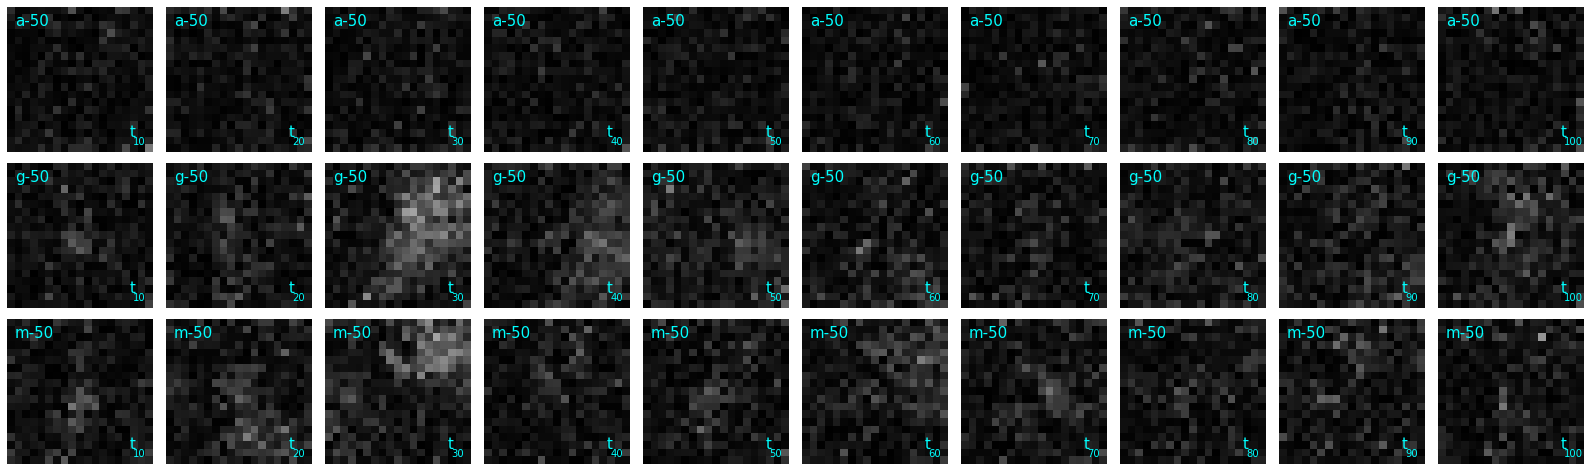

In [ ]:
speeds = [4,4,4]
classes = [0,6,12]
labels = ['a','g','m']
t_labels = ['10','20','30','40','50','60','70','80','90','100']

fig10A, axs = plt.subplots(3,10, figsize = (25*(4/7)*(5/4)*(10/8),7*1.5*(2/3)*(8/6)*0.95*(3/4)))
for i in range(len(labels)):
    X_test= open_obj(dir_data + rf"/dynamic/{speeds[i]}/X_test_RA")
    for j in range(len(t_labels)):
        axs[i,j].imshow(X_test[classes[i]+13*(100+1*j),1,:,:,0], cmap='gray', vmin=min_val, vmax=max_val)
        axs[i,j].axis('off')
        axs[i,j].text(0.5, 2, labels[i]+'-50', fontsize=15, color='cyan')
        axs[i,j].text(15.5, 16.5, 't', fontsize=15, color='cyan')
        axs[i,j].text(16, 17.5, t_labels[j], fontsize=10, color='cyan')

plt.subplots_adjust(wspace=0.05, hspace=0.08)
plt.tight_layout()
fig10A.savefig(dir_figures + r"/fig10a.png")

## Fig. 10B

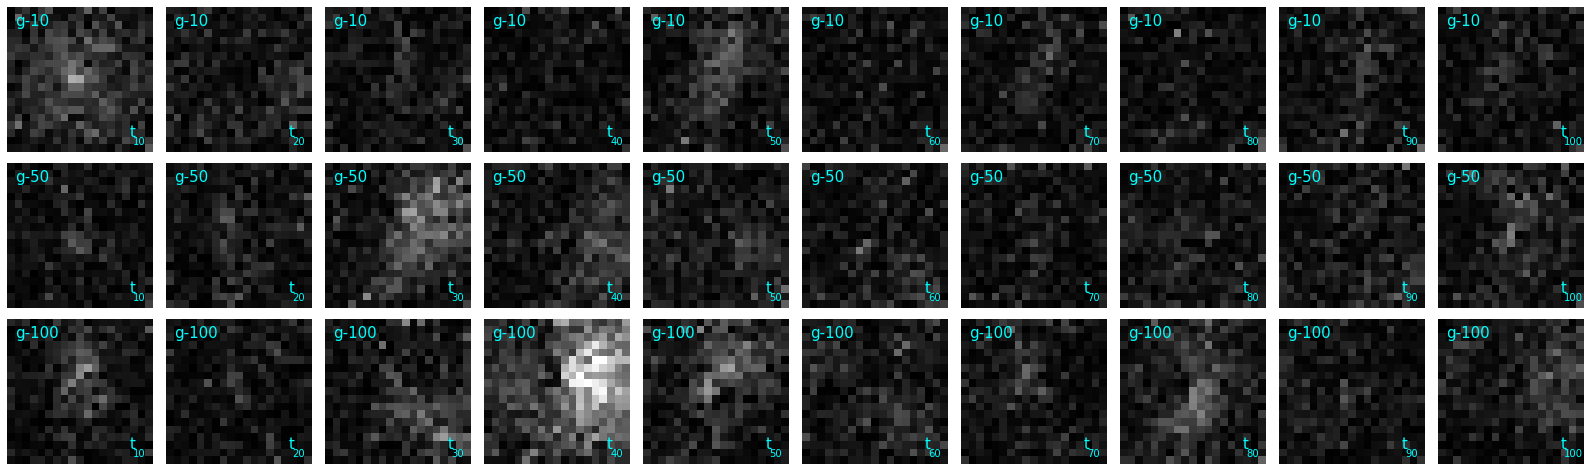

In [ ]:
speeds = [0,4,9]
labels = ['10','50','100']
classes = [6,6,6]
t_labels = ['10','20','30','40','50','60','70','80','90','100']

fig10B, axs = plt.subplots(3,10, figsize = (25*(4/7)*(5/4)*(10/8),7*1.5*(2/3)*(8/6)*0.95*(3/4)))
for i in range(len(labels)):
    X_test= open_obj(dir_data + rf"/dynamic/{speeds[i]}/X_test_RA")
    for j in range(len(t_labels)):
        axs[i,j].imshow(X_test[classes[i]+13*(100+1*j),1,:,:,0], cmap='gray', vmin=min_val, vmax=max_val)
        axs[i,j].axis('off')
        axs[i,j].text(0.5, 2, 'g-'+labels[i], fontsize=15, color='cyan')
        axs[i,j].text(15.5, 16.5, 't', fontsize=15, color='cyan')
        axs[i,j].text(16, 17.5, t_labels[j], fontsize=10, color='cyan')

plt.subplots_adjust(wspace=0.05, hspace=0.08)
plt.tight_layout()
fig10B.savefig(dir_figures + r"/fig10b.png")

--------------------------------------------------------------------------

## Fig. 11A

In [8]:
result = np.empty((n_speeds,n_static,n_textures))
for i in range(n_speeds):
    print(i, end=' ')
    X_test = open_obj(dir_data + rf"/static/{i}/X_test_RA")
    model = load_model(glob.glob(dir_models + rf"/static_RA/{i}/*.hdf5".format(i))[-1])
    result[i,:,:] = model.predict(X_test)

save_obj(result, dir_figures + r"/result11a")

0 WARNING:tensorflow:From C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.


1 2 3 4 5 6 7 8 9 

In [9]:
result = open_obj(dir_figures + r"/result11a")
accuracies = np.zeros(n_speeds)
cm = np.zeros((n_speeds,n_textures,n_textures))
for i in range(n_speeds):
    y_test = open_obj(dir_data + rf"/static/{i}/y_test_SA")
    label_test = np.zeros((n_static,1))
    prediction = np.zeros((n_static,1))
    for k in range(n_static):
        label_test[k] = np.where(y_test[1][k,:]==1)[0][0]
        prediction[k] = np.argmax(result[i,k,:])
        if prediction[k]==label_test[k]: accuracies[i]+=1
    cm[i] = confusion_matrix(label_test, prediction)

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


mean accuracy=53%


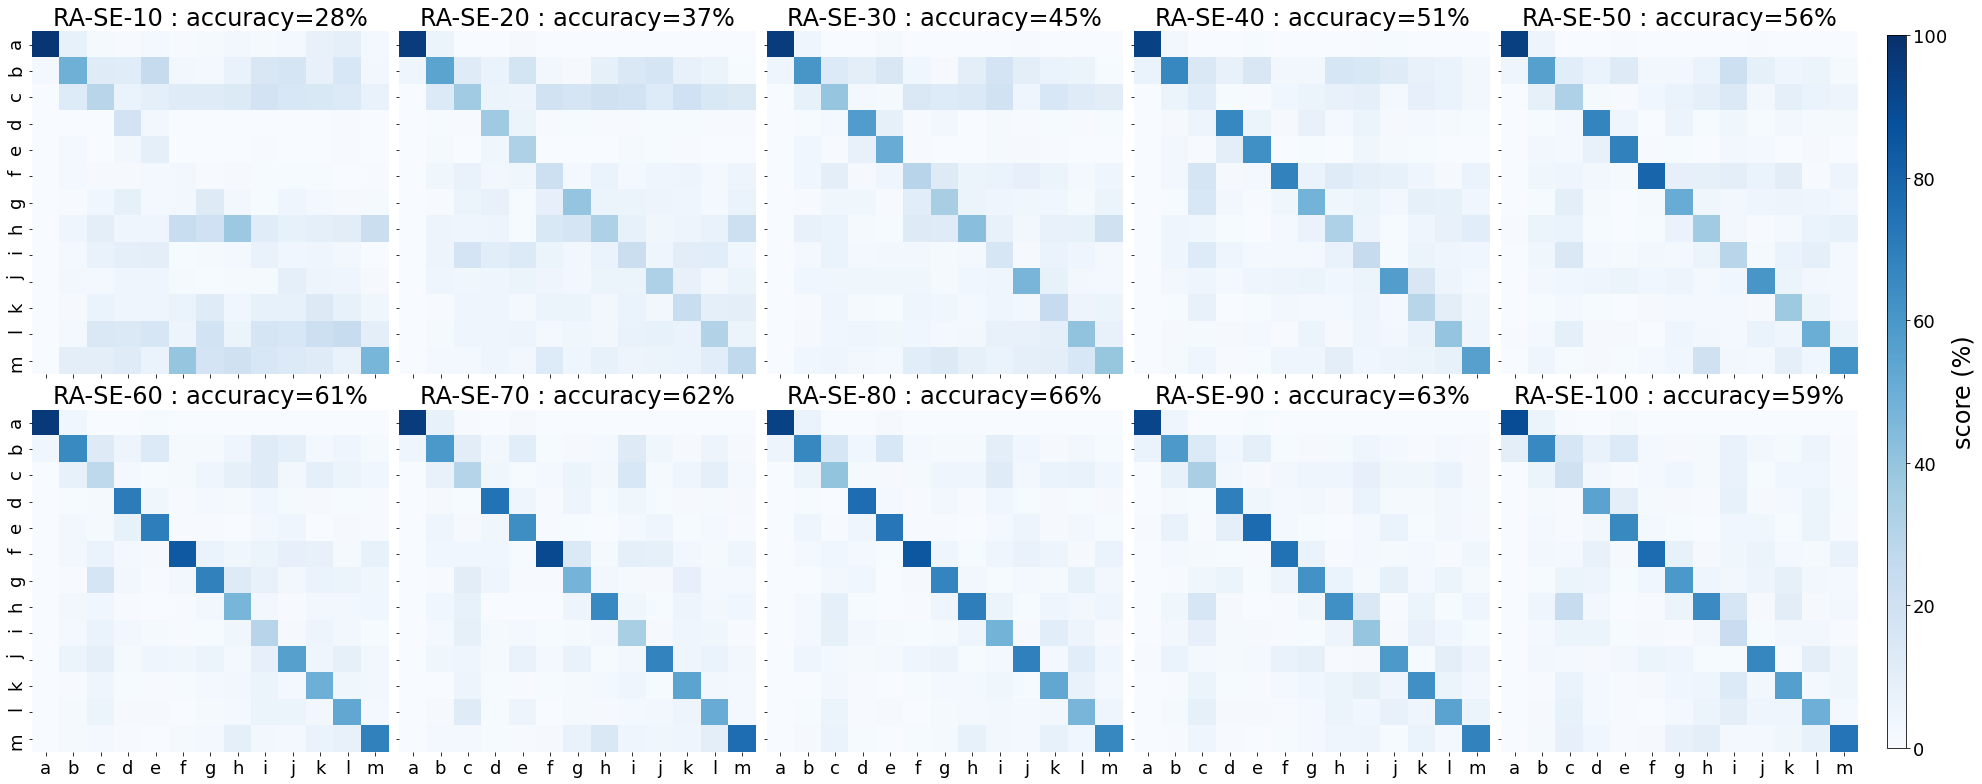

In [10]:
fig11A, axs = plt.subplots(2,5, figsize=(26,11))
colour = sns.color_palette("Blues",2500)
for i, ax in enumerate(axs.flat):
        sns.heatmap(np.transpose(cm[i]/25), vmin=0, vmax=100, cmap=colour, ax=ax, cbar=False)
        ax.set_xticklabels([], rotation=0)
        ax.set_yticklabels([], rotation=0)
        ax.set_yticks(np.linspace(0.5, 12.5, 13))
        ax.set_title(f'RA-SE-{int(10*(i+1))} : accuracy={int(np.round(100*accuracies[i]/n_static))}%', size=24)

axs[0,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
axs[1,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
for j in range(5):
        axs[1,j].set_xticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=0, size=18)

fig11A.subplots_adjust(right=0.85)
cax = fig11A.add_axes([1.01, 0.05, 0.01, 0.9])
cbar = fig11A.colorbar(axs[0,0].collections[0], cax=cax)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('score (%)', size=24)

plt.tight_layout()
fig11A.savefig(dir_figures + r"/fig11a.png")

print("mean accuracy={:.0f}%".format(100*np.mean(accuracies)/n_static))

--------------------------------------------------------------------------

## Fig. 11B

In [ ]:
result = np.empty((n_speeds,n_dynamic,n_textures))
for i in range(n_speeds):
    print(i, end=' ')
    X_test = open_obj(dir_data + rf"/dynamic/{i}/X_test_RA")
    model = load_model(glob.glob(dir_models + rf"/dynamic_RA/{i}/*.hdf5")[-1])
    result[i,:,:] = model.predict(X_test)

save_obj(result, dir_figures + r"/result11b")

0 1 2 3 4 5 6 7 8 9 

In [ ]:
result = open_obj(dir_figures + r"/result11b")
accuracies = np.zeros(n_speeds)
cm = np.zeros((n_speeds,n_textures,n_textures))
for i in range(n_speeds):
    y_test = open_obj(dir_data + rf"/dynamic/{i}/y_test_RA")
    label_test = np.zeros((n_dynamic,1))
    prediction = np.zeros((n_dynamic,1))
    for k in range(n_dynamic):
        label_test[k] = np.where(y_test[1][k,:]==1)[0][0]
        prediction[k] = np.argmax(result[i,k,:])
        if prediction[k]==label_test[k]: accuracies[i]+=1
    cm[i] = confusion_matrix(label_test, prediction)

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


mean accuracy=70%


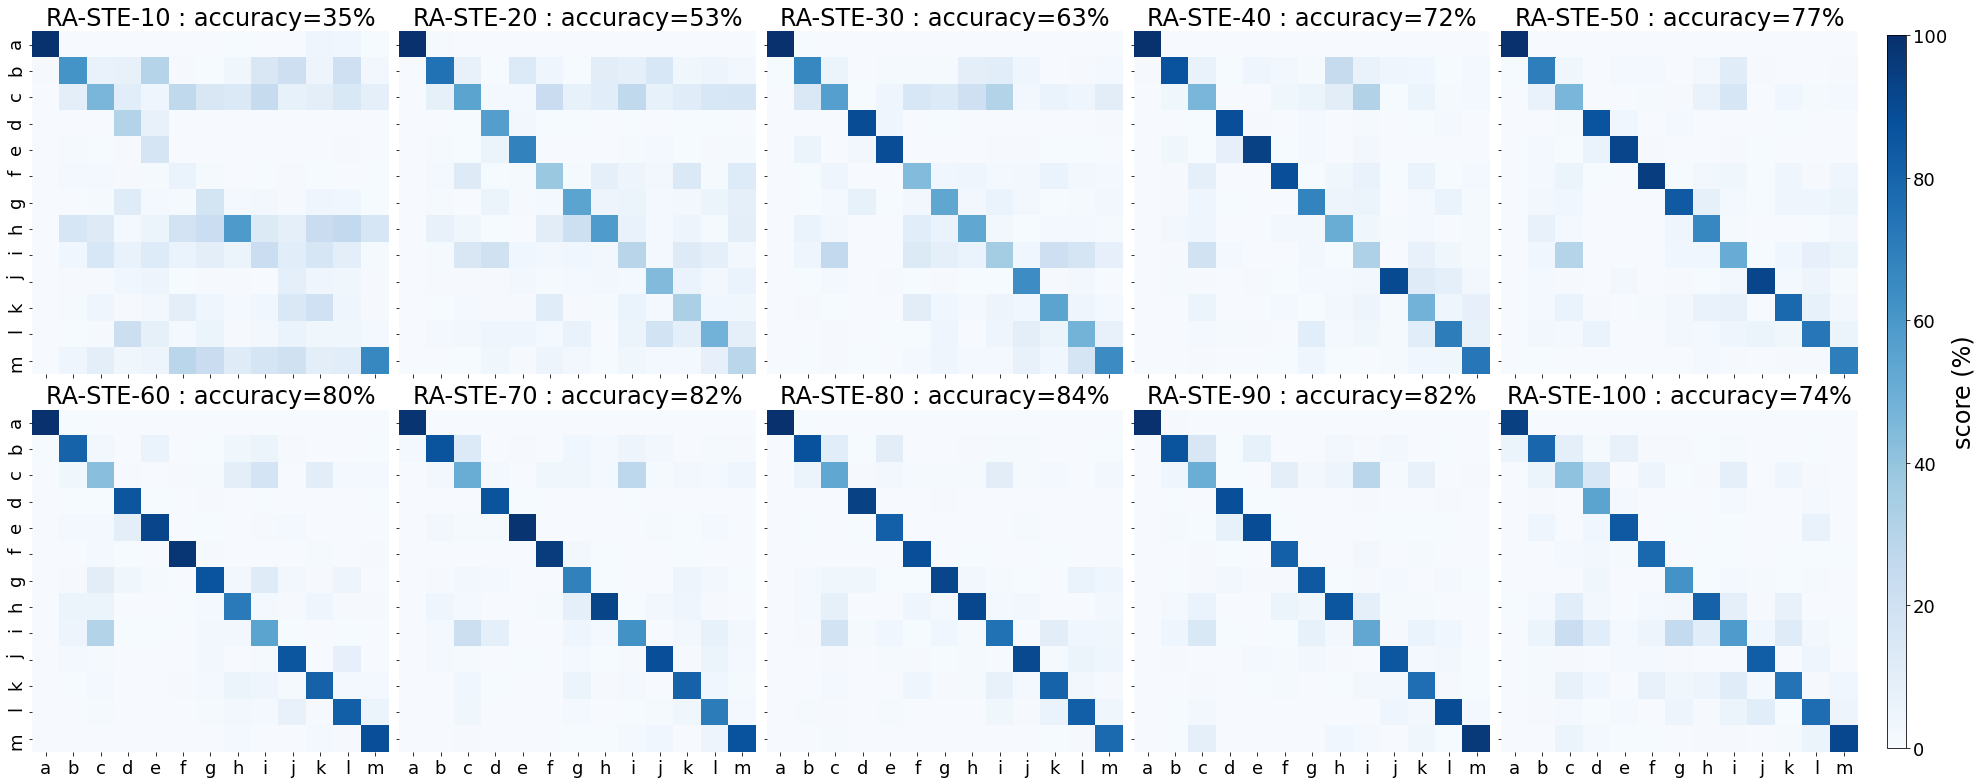

In [ ]:
fig11B, axs = plt.subplots(2,5, figsize=(26,11))
colour = sns.color_palette("Blues",250)
for i, ax in enumerate(axs.flat):
        sns.heatmap(np.transpose(cm[i]/2.5), vmin=0, vmax=100, cmap=colour, ax=ax, cbar=False)
        ax.set_xticklabels([], rotation=0)
        ax.set_yticklabels([], rotation=0)
        ax.set_yticks(np.linspace(0.5, 12.5, 13))
        ax.set_title(f"RA-STE-{int(10*(i+1))} : accuracy={int(np.round(100*accuracies[i]/n_dynamic))}%", size=24)

axs[0,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
axs[1,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
for j in range(5):
        axs[1,j].set_xticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=0, size=18)

fig11B.subplots_adjust(right=0.85)
cax = fig11B.add_axes([1.01, 0.05, 0.01, 0.9])
cbar = fig11B.colorbar(axs[0,0].collections[0], cax=cax)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('score (%)', size=24)

plt.tight_layout()
fig11B.savefig(dir_figures + r"/fig11b.png")

print("mean accuracy={:.0f}%".format(100*np.mean(accuracies)/n_dynamic))

--------------------------------------------------------------------------

## Fig. 12

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

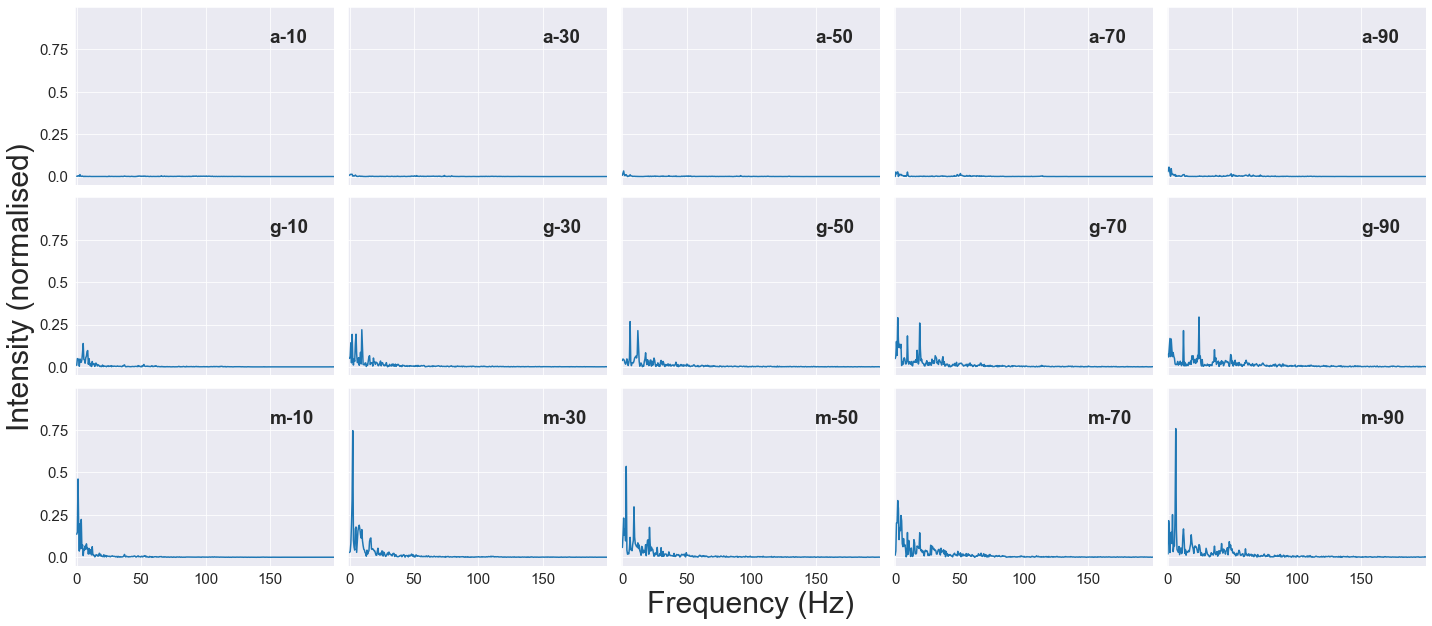

In [ ]:
sns.set_style("darkgrid")
colour_2 = sns.color_palette("tab20c",10)
colours = sns.color_palette(sns.mpl_palette("Set2", 4))

classes = [0,6,12]
stims = ['a','g','m']
speeds = [1,3,4,7,9]
v = [10,30,50,70,90]

fig12, axs = plt.subplots(3, 5, figsize = (20, 11*(4/5)), sharex = True, sharey = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=0.05)
for i in range(len(speeds)):
    for j in range(len(classes)):
        X_test = open_obj(dir_data + rf"/vibration/{speeds[i]}/X_test")
        sns.lineplot(np.linspace(0,200,400), X_test[classes[j]+n_textures*n_speeds,0:400], ax = axs[j,i])
        axs[j,i].set_xlim([-1,200])
        axs[j,i].set_ylim([-0.05,1])
        axs[j,i].set_xticks(np.linspace(0,150,4))
        axs[j,i].set_yticks(np.linspace(0,0.75,4))
        axs[j,i].set_xticklabels([0,50,100,150], fontsize=15)
        axs[j,i].set_yticklabels(np.linspace(0,0.75,4), fontsize=15)
        axs[j,i].annotate(stims[j]+'-'+str(v[i]), xy=(0.75,0.8), xycoords='axes fraction', fontsize=19, weight = 'bold')
axs[1,0].set_ylabel('Intensity (normalised)', size=30)
axs[2,2].set_xlabel('Frequency (Hz)', size=30)
# fig12.suptitle("FFT of vibrotactile data, for 3 textures a, g, m at speeds 10, 30, 50, 70, 90mms$^{-1}$.", y=1, size = 32)
plt.subplots_adjust(wspace=0.05, hspace=0.08)
plt.tight_layout()
fig12.savefig(dir_figures + r"/fig12.png")

--------------------------------------------------------------------------

## Fig. 13A

In [ ]:
n_features = 200
result = np.empty((n_speeds,n_vibration,n_textures))
for i in range(n_speeds):
    print(i, end=' ')
    X_test = open_obj(dir_data + rf"/vibration/{i}/X_test")
    X_test = np.expand_dims(X_test[:,:n_features], axis=2)
    model = load_model(glob.glob(dir_models + rf"/vibration/{i}/*.hdf5")[-1])
    result[i] = model.predict(X_test)

save_obj(result, dir_figures + r"/result13a")

0 1 2 3 4 5 6 7 8 9 

In [ ]:
result = open_obj(dir_figures + r"/result13a")
accuracies = np.zeros(n_speeds)
cm = np.zeros((n_speeds,n_textures,n_textures))
for i in range(n_speeds):
    y_test = open_obj(dir_data + rf"/vibration/{i}/y_test")
    label_test = np.zeros((n_vibration,1))
    prediction = np.zeros((n_vibration,1))
    for k in range(n_vibration):
        label_test[k] = np.where(y_test[k,:]==1)[0][0]
        prediction[k] = np.argmax(result[i,k,:])
        if prediction[k]==label_test[k]: accuracies[i]+=1
    cm[i] = confusion_matrix(label_test, prediction)

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


mean accuracy=50%


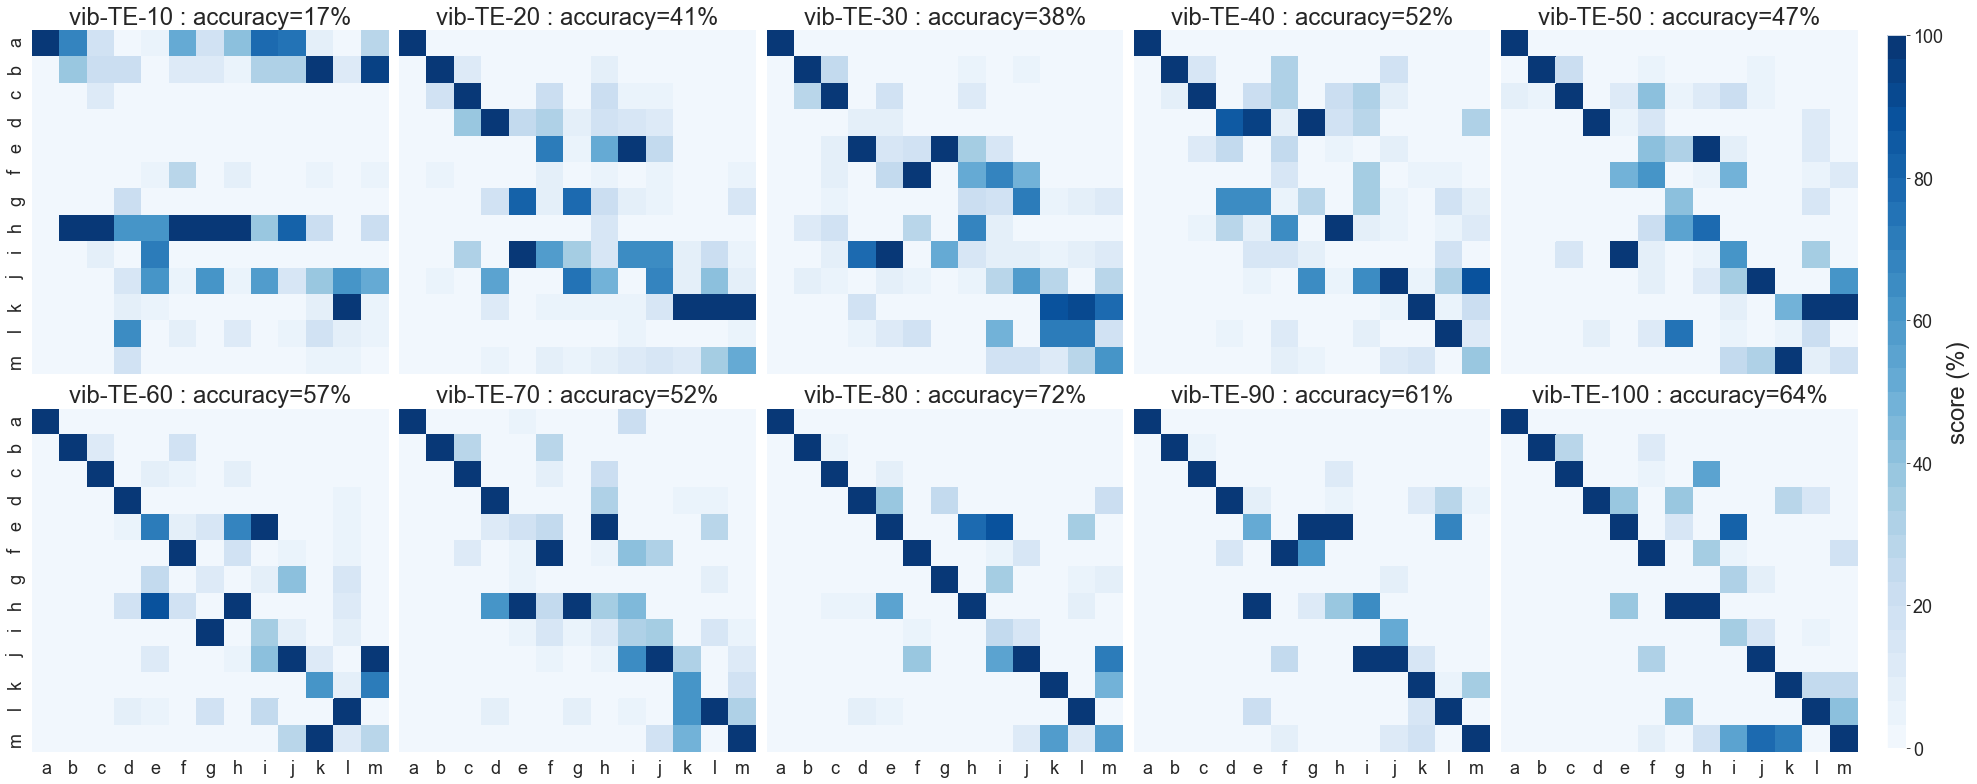

In [ ]:
fig13A, axs = plt.subplots(2,5, figsize=(26,11))
colour = sns.color_palette("Blues",30)
for i, ax in enumerate(axs.flat):
        sns.heatmap(np.transpose(cm[i]/0.3), vmin=0, vmax=100, cmap=colour, ax=ax, cbar=False)
        ax.set_xticklabels([], rotation=0)
        ax.set_yticklabels([], rotation=0)
        ax.set_yticks(np.linspace(0.5, 12.5, 13))
        ax.set_title(f"vib-TE-{int(10*(i+1))} : accuracy={int(np.round(100*accuracies[i]/n_vibration))}%", size=24)

axs[0,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
axs[1,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
for j in range(5):
        axs[1,j].set_xticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=0, size=18)

fig13A.subplots_adjust(right=0.85)
cax = fig13A.add_axes([1.01, 0.05, 0.01, 0.9])
cbar = fig13A.colorbar(axs[0,0].collections[0], cax=cax)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('score (%)', size=24)

plt.tight_layout()
fig13A.savefig(dir_figures + r"/fig13a.png")

print("mean accuracy={:.0f}%".format(100*np.mean(accuracies)/n_vibration))

--------------------------------------------------------------------------

## Fig. 13B

In [ ]:
n_features = 200
result = np.empty((n_speeds,n_vibration,n_textures))
for i in range(n_speeds):
    print(i, end=' ')
    X_test = open_obj(dir_data + rf"/vibration/{i}/X_test")
    X_test = np.expand_dims(X_test[:,:n_features], axis=2)
    model = load_model(glob.glob(dir_models + rf"/vibration_augmented/{i}/*.hdf5")[-1])
    result[i] = model.predict(X_test)

save_obj(result, dir_figures + r"/result13b")

0 1 2 3 4 5 6 7 8 9 

In [ ]:
result = open_obj(dir_figures + r"/result13b")
accuracies = np.zeros(n_speeds)
cm = np.zeros((n_speeds,n_textures,n_textures))
for i in range(n_speeds):
    y_test = open_obj(dir_data + rf"/vibration/{i}/y_test")
    label_test = np.zeros((n_vibration,1))
    prediction = np.zeros((n_vibration,1))
    for k in range(n_vibration):
        label_test[k] = np.where(y_test[k,:]==1)[0][0]
        prediction[k] = np.argmax(result[i,k,:])
        if prediction[k]==label_test[k]: accuracies[i]+=1
    cm[i] = confusion_matrix(label_test, prediction)

C:\Users\nl13426\anaconda3\envs\tactip1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


mean accuracy=90%


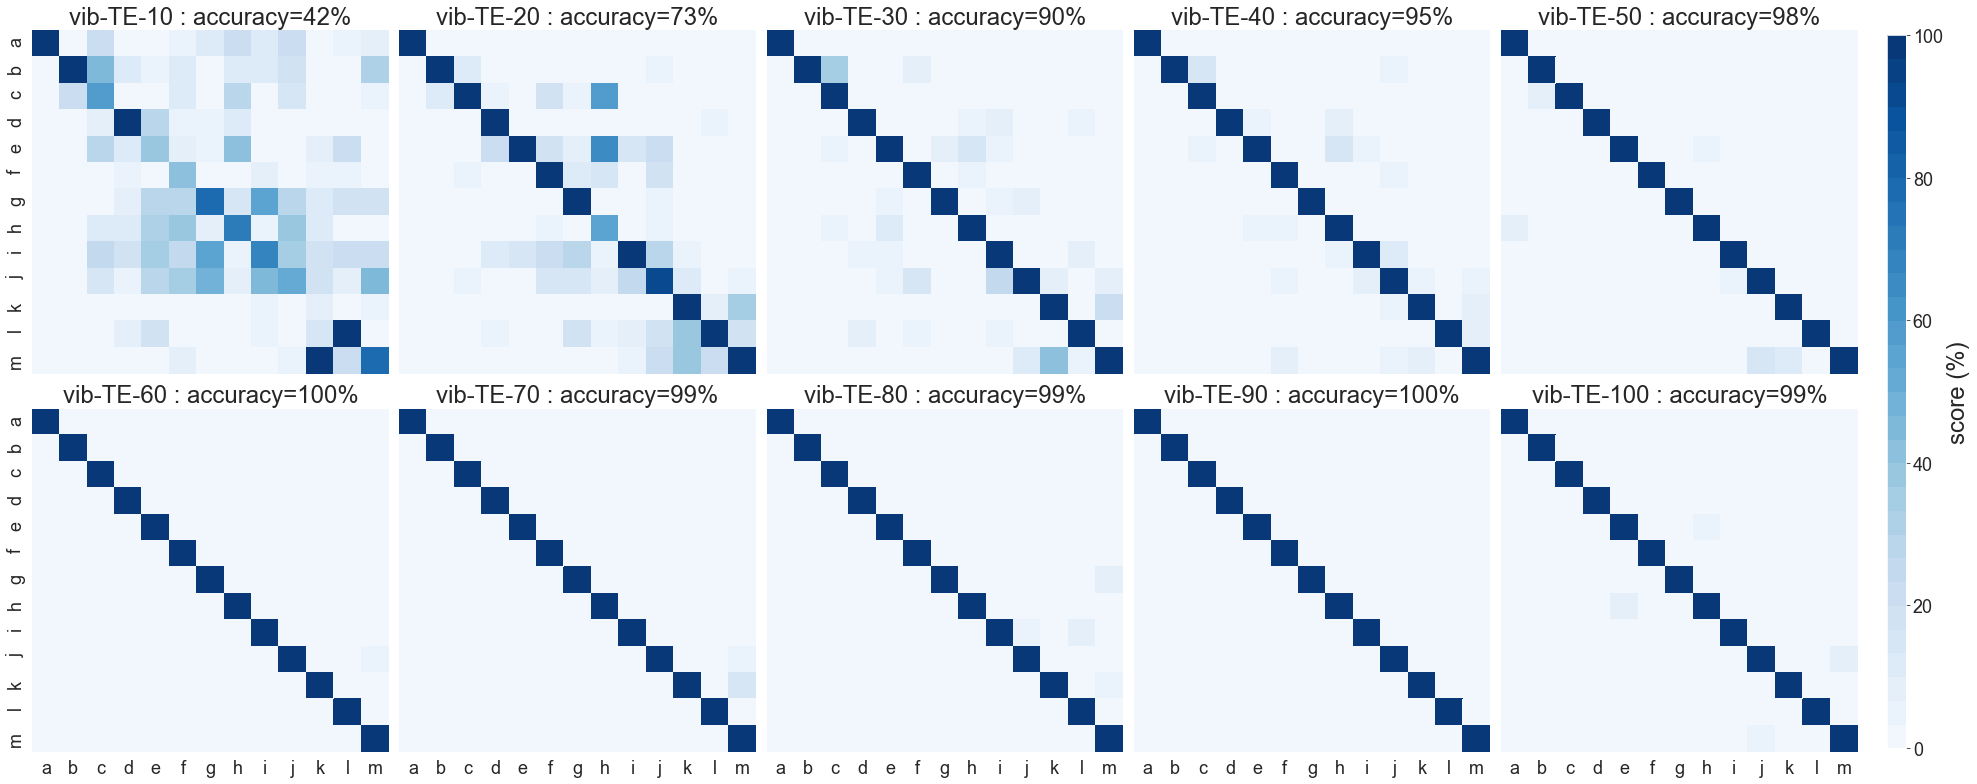

In [ ]:
fig13B, axs = plt.subplots(2,5, figsize=(26,11))
colour = sns.color_palette("Blues",30)
for i, ax in enumerate(axs.flat):
        sns.heatmap(np.transpose(cm[i]/0.3), vmin=0, vmax=100, cmap=colour, ax=ax, cbar=False)
        ax.set_xticklabels([], rotation=0)
        ax.set_yticklabels([], rotation=0)
        ax.set_yticks(np.linspace(0.5, 12.5, 13))
        ax.set_title(f"vib-TE-{int(10*(i+1))} : accuracy={int(np.round(100*accuracies[i]/n_vibration))}%", size=24)

axs[0,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
axs[1,0].set_yticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=90, size=18)
for j in range(5):
        axs[1,j].set_xticklabels(['a','b','c','d','e','f','g','h','i','j','k','l','m'], rotation=0, size=18)

fig13B.subplots_adjust(right=0.85)
cax = fig13B.add_axes([1.01, 0.05, 0.01, 0.9])
cbar = fig13B.colorbar(axs[0,0].collections[0], cax=cax)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('score (%)', size=24)

plt.tight_layout()
fig13B.savefig(dir_figures + r"/fig13b.png")

print("mean accuracy={:.0f}%".format(100*np.mean(accuracies)/n_vibration))